# Google Trends Tutorial


Google Trends is a website for investigating how different Google keyword searches have trended over time. There is so much you can do with this resource, from comparing the interest in different topics by state to discovering new trends in shopping searches.

### To get started, first check out the [Google Trends website](https://trends.google.com/trends/)
  - Enter some keyword search terms to see trends over time (you can compare up to 5 terms).
  - You can filter on date range, geography, search categories (e.g. Shopping Search) and types (e.g News, Images, etc, all the normal types of Google searches you can do).
  - Google returns daily or weekly aggregations based on how long the time frame is.

### A few caveats to bear in mind with Google Trends
  - Google provides *sampled* data, so if you pull the same data twice there may be a small amount of variability.
  - The data is scaled, so that the maximum value in any requested dataset will be 100. So if you separately pull reports for different keywords, you won't be able to tell relative popularity between them (but you can pull multiple keywords at a time to compare their search interest directly).
  - The search interest values provided are NOT the same as search *volume*. They are search interest *relative to all Google searches* during the time period and geography you are requesting. Since the overall usage of Google has grown over the years, this means that a search term that has constant search *volume* will show up as having decreasing search *interest* over time (see section at end of notebook).
  
### PyTrends
Google does not supply an API for Google Trends, but some lovely folks at General Mills have created the **PyTrends** package for pulling this data from Python. Documentation is in the README of the GitLab repo [here](https://github.com/GeneralMills/pytrends). You can install PyTrends by running:

```
pip install pytrends
```

Let's get started by importing the above package into this Jupyter Notebook:

In [1]:
from pytrends.request import TrendReq

%matplotlib inline

# set a nice plotting style
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# with open('super_secrets.txt', 'r') as f:
#     username, password = f.read().splitlines() 

# connector = TrendReq(username, password)

In [3]:
# Enter your Google username and password

connector = TrendReq('username', 'password')

## Download some data

Now that you are logged into Google, you can build a "payload" to specify what data you want to download. PyTrends returns the data as a Pandas dataframe.

In [4]:
my_search_terms = ['sklearn']  # list with up to 5 items

connector.build_payload(my_search_terms)
df = connector.interest_over_time()

In [5]:
df.head()

,sklearn
date,
2012-11-04,2
2012-11-11,3
2012-11-18,2
2012-11-25,3
2012-12-02,3


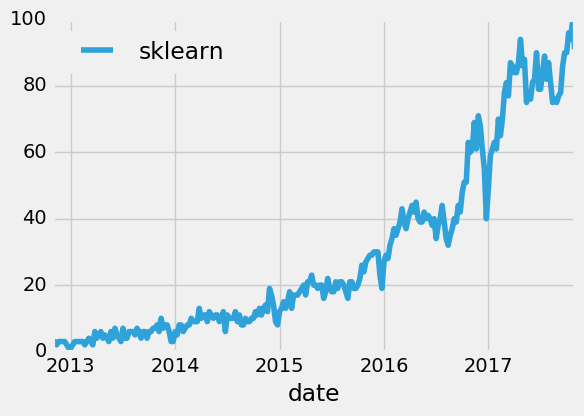

In [6]:
df.plot()

In [7]:
connector.build_payload?

### Building advanced requests

By default the `build_payload()` method will give you 5 years of worldwide data, with no filters applied on search type or category. There are many categories you can choose from by setting the `cat` parameter (default `cat=0` means all categories, i.e. a normal Google search); a few other options are:
- Shopping: `cat=18`
- Computers & Electronics: `cat=5`
- Sports: `cat=20`
- Travel: `cat=67`
    
Similary, the default setting of `gprop=''` gives you regular Web Search data. You can filter to other types of searches by setting `gprop` to:
- 'images'
- 'news'
- 'youtube'
- 'froogle' (Google Shopping)

Geography can be specified with the `geo` parameter, e.g. `geo='US'` will give you search interest in the U.S.

Timeframe is a bit tricky. If you need to be more specific than the default 5 year window, I recommend giving custom start and end dates. The structure for this is to set the `timeframe` parameter to a string with a space between start and end dates: `'yyyy-mm-dd yyyy-mm-dd'`.

In [8]:
# Google Shopping searches for skis and snowboards in the US for last three years
connector.build_payload(['skis', 'snowboards'], geo='US', gprop='froogle')

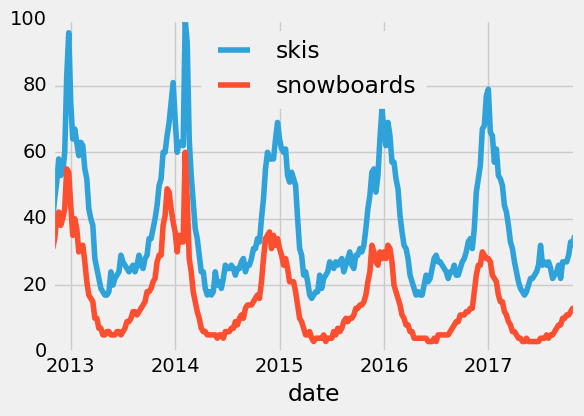

In [9]:
df = connector.interest_over_time()
df.plot()

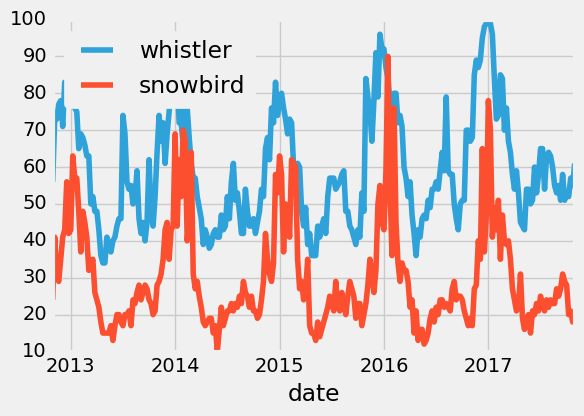

In [10]:
connector.build_payload(['whistler', 'snowbird'], geo='US')
df = connector.interest_over_time()
df.plot()

In [11]:
df_regional = connector.interest_by_region()
df_regional

,whistler,snowbird
geoName,,
Alabama,4,2
Alaska,8,4
Arizona,5,2
Arkansas,3,1
California,7,2
Colorado,8,5
Connecticut,5,2
Delaware,4,1
District of Columbia,5,2


In [12]:
df_top_states = df_regional.loc[df_regional.whistler > df_regional.whistler.quantile(0.75)]

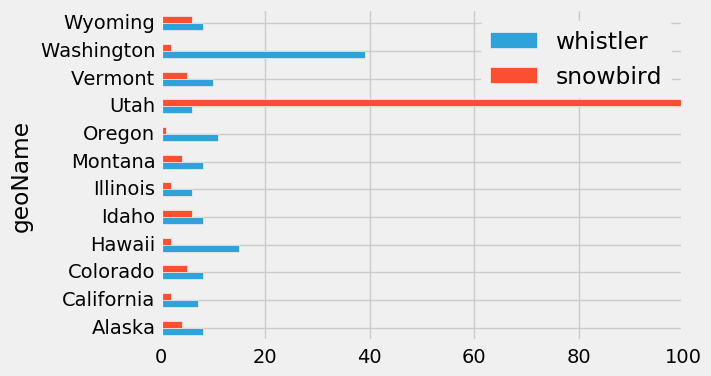

In [13]:
df_top_states.plot.barh()

## Related search terms
Terms that are frequently searched for (in the same session) with the search term you provided. 
- `top` gives the most popular related terms in the same timeframe/geography.
- `rising` gives the terms that had the highest growth compared with the previous time period.

In [14]:
connector.build_payload(['sklearn', 'pandas', 'python'], cat=5)

In [15]:
related = connector.related_queries()

In [16]:
related.keys()

dict_keys(['skis', 'snowboards', 'snowbird', 'python', 'whistler', 'sklearn', 'pandas'])

In [17]:
related['sklearn'].keys()

dict_keys(['top', 'rising'])

In [18]:
related['sklearn']['top'].head(10)

,query,value
0,python sklearn,100
1,numpy,50
2,install sklearn,35
3,python install sklearn,25
4,scipy,20
5,matplotlib,20
6,pip install sklearn,10
7,github sklearn,10
8,github,10
9,no module named sklearn,10


In [19]:
related['sklearn']['rising'].head(10)

,query,value
0,python install sklearn,681100
1,matplotlib,590000
2,sklearn linear regression,229000
3,sklearn pca,209150
4,logistic regression sklearn,174750
5,sklearn metrics,161800
6,sklearn decision tree,161350
7,sklearn normalize,155750
8,sklearn kmeans,124500
9,grid search sklearn,108700


# Google Search Interest vs Volume

Sometimes you really want a measure of volume, not interest relative to all other searches. One approach to this is outlined in "Analysis of the Capacity of Google Trends to Measure Interest in Conservation Topics and the Role of Online News" by [Nghiem, Papworth, Lim & Carrasco (2016)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4814066/). The authors describe using benchmark search terms such as "love", "life", "computer", and "software", for comparison with the keywords they are interested in. They hypothesize that search volume for the "love" and "life" has increased over time along with the growth of the internet, and that volume for "computer" and "software" has remained relatively constant.

In [20]:
connector.build_payload(['love', 'life', 'computer', 'software'])

In [21]:
df_benchmarks = connector.interest_over_time()

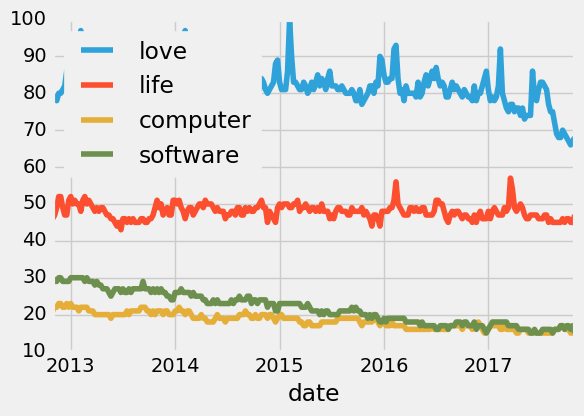

In [22]:
df_benchmarks.plot()